## Predicting if a project would be successfully funded

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
projects = pd.DataFrame.from_csv('opendata_projects.csv', index_col=None)

In [4]:
projects.head()

,_projectid,_teacher_acctid,_schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,students_reached,total_donations,num_donors,eligible_double_your_impact_match,eligible_almost_home_match,funding_status,date_posted,date_completed,date_thank_you_packet_mailed,date_expiration
0,7342bd01a2a7725ce033a179d22e382d,5c43ef5eac0f5857c266baa1ccfa3d3f,9e72d6f2f1e9367b578b6479aa5852b7,3.600097e+11,40.688454,-73.910432,Brooklyn,NY,11207,urban,...,0,251,1,f,f,completed,2002-09-13 00:00:00,2002-09-23 00:00:00,2003-01-27 00:00:00,2003-12-31 00:00:00
1,b56b502d25666e29550d107bf7e17910,57426949b47700ccf62098e1e9b0220c,4a06a328dd87bd29892d73310052f45f,3.600077e+11,40.770233,-73.950760,New York,NY,10075,NaN,...,0,125,1,f,f,completed,2002-09-16 00:00:00,2002-09-19 00:00:00,2002-12-19 00:00:00,2003-12-31 00:00:00
2,3a88a47f97bd0c9b7c6a745bcd831ce3,7a20087fac86232883537cab45c0a6c9,66d08b506d2f3c30dec9e6fdb03cc279,3.600122e+11,40.729763,-73.816925,Flushing,NY,11367,urban,...,0,2110,1,f,f,completed,2002-09-17 00:00:00,2003-03-17 00:00:00,2004-06-14 00:00:00,2003-12-31 00:00:00
3,0b8a4f8eb1822ab6dd5cd9ffb918ece3,e5d28482308e2007992ae8b358b31bce,9bc7d4d92193a453669b6e2a56128e87,3.600077e+11,40.701778,-74.011840,New York,NY,10004,urban,...,0,1241,1,f,f,completed,2002-09-17 00:00:00,2002-09-17 00:00:00,2003-12-18 00:00:00,2003-12-31 00:00:00
4,45235cb116b3b35cd86d1c3a63961d7d,214d75bd0e6ce3e7085278ddd8f26daa,f7f12dee0009e6f9afa301bcca9d5070,NaN,40.815018,-73.856094,Bronx,NY,10473,urban,...,0,83,1,f,f,completed,2002-09-17 00:00:00,2002-09-17 00:00:00,2004-01-28 00:00:00,2003-12-31 00:00:00


In [5]:
projects.funding_status.unique()

array(['completed', 'expired', 'reallocated', 'live'], dtype=object)

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
proj = projects.apply(le.fit_transform)

C:\Users\mjanyavula\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\lib\arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


In [7]:
proj.head()

,_projectid,_teacher_acctid,_schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,students_reached,total_donations,num_donors,eligible_double_your_impact_match,eligible_almost_home_match,funding_status,date_posted,date_completed,date_thank_you_packet_mailed,date_expiration
0,396045,116177,40132,36170,43071,57893,1010,35,1610,3,...,0,251,1,0,0,0,0,4,30,163
1,622792,109818,18893,35354,44160,57443,6112,35,1469,0,...,0,125,1,0,0,0,1,2,21,163
2,201387,153617,26128,36594,43640,58493,2930,35,1655,3,...,0,2110,1,0,0,0,2,74,207,163
3,39781,289467,39481,35389,43275,56992,6112,35,1436,3,...,0,1241,1,0,0,0,2,1,111,163
4,237629,41927,62855,66378,44571,58325,997,35,1509,3,...,0,83,1,0,0,0,2,1,127,163


In [8]:
proj = proj[proj.total_price_including_optional_support > 0]
projects = projects[projects.total_price_including_optional_support > 0]

In [9]:
# Categorical features
# Using OnHotEncode for categorical features
enc = preprocessing.OneHotEncoder()
a = enc.fit_transform(proj[['school_metro','primary_focus_subject','school_state','poverty_level','grade_level','resource_type']]).toarray()

In [49]:
# Boolean features
b = proj.as_matrix([['school_charter','school_magnet','school_year_round','school_nlns','school_kipp','school_charter_ready_promise',
                     'eligible_double_your_impact_match','eligible_almost_home_match','teacher_teach_for_america',
                    'teacher_ny_teaching_fellow']])

In [10]:
# Numerical feature
z = projects.as_matrix([['total_price_including_optional_support']])

In [50]:
## Concatenate all features to use as input to model
c = np.concatenate((a,b,z),axis=1)

In [51]:
c

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   2.79270000e+02],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.52440000e+02],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   2.23780000e+03],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.14972000e+03],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   7.29760000e+02],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   9.67520000e+02]])

In [52]:
pd.DataFrame(c).head()

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,279.27
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,152.44
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2237.80
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1376.83
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,101.22


In [14]:
#proj_input = proj[['school_charter','school_magnet','school_year_round','school_nlns','school_kipp','school_charter_ready_promise']]
proj_input = c
proj_output = proj['funding_status']
#proj_input = proj_input.replace('f',0).replace('t',1)


In [100]:
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(proj_input,proj_output)

In [101]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier()
clf2 = clf2.fit(proj_input,proj_output)

In [102]:
proj['predicted_by_clf1'] = clf1.predict(proj_input)
proj['predicted_by_clf2'] = clf2.predict(proj_input)

In [104]:
proj[proj.funding_status == 1][['funding_status','predicted_by_clf1','predicted_by_clf2','total_price_including_optional_support']].head()

,funding_status,predicted_by_clf1,predicted_by_clf2,total_price_including_optional_support
159,1,1,1,1435
160,1,1,1,81004
211,1,1,1,45791
506,1,1,1,42950
507,1,1,1,20075


In [338]:
a = pd.DataFrame(clf1.predict(proj_input))

In [106]:
clf1.predict(proj_input)

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [427]:
tree.export_graphviz(clf1,out_file='clf1_4.dot')     

In [105]:
proj['total_price_including_optional_support'].head()

0     13695
1      1713
2    120803
3     98050
4       236
Name: total_price_including_optional_support, dtype: int64

## Evaluating models with different parameters

**Functions from CS109**

In [15]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

In [16]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Generic classification and optimization functions from last lab
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# clf - original classifier
# parameters - grid to search over
# X - usually your training X matrix
# y - usually your training y 
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Important parameters
# indf - Input dataframe
# featurenames - vector of names of predictors
# targetname - name of column you want to predict (e.g. 0 or 1, 'M' or 'F', 
#              'yes' or 'no')
# target1val - particular value you want to have as a 1 in the target
# mask - boolean vector indicating test set (~mask is training set)
# reuse_split - dictionary that contains traning and testing dataframes 
#              (we'll use this to test different classifiers on the same 
#              test-train splits)
# score_func - we've used the accuracy as a way of scoring algorithms but 
#              this can be more general later on
# n_folds - Number of folds for cross validation ()
# n_jobs - used for parallelization
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    #subdf=indf[featurenames]
    X=featurenames#subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Plot tree containing only two covariates
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

from matplotlib.colors import ListedColormap
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def plot_2tree(ax, Xtr, Xte, ytr, yte, clf, plot_train = True, plot_test = True, lab = ['Feature 1', 'Feature 2'], mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.3, psize=10, zfunc=False):
    # Create a meshgrid as our test data
    plt.figure(figsize=(15,10))
    plot_step= 0.05
    xmin, xmax= Xtr[:,0].min(), Xtr[:,0].max()
    ymin, ymax= Xtr[:,1].min(), Xtr[:,1].max()
    xx, yy = np.meshgrid(np.arange(xmin, xmax, plot_step), np.arange(ymin, ymax, plot_step) )

    # Re-cast every coordinate in the meshgrid as a 2D point
    Xplot= np.c_[xx.ravel(), yy.ravel()]


    # Predict the class
    Z = clfTree1.predict( Xplot )

    # Re-shape the results
    Z= Z.reshape( xx.shape )
    cs = plt.contourf(xx, yy, Z, cmap= cmap_light, alpha=0.3)
  
    # Overlay training samples
    if (plot_train == True):
        plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, alpha=alpha,edgecolor="k") 
    # and testing points
    if (plot_test == True):
        plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=alpha, marker="s")

    plt.xlabel(lab[0])
    plt.ylabel(lab[1])
    plt.title("Boundary for decision tree classifier",fontsize=7.5)

In [58]:
len(proj)

878547

In [37]:
projects[projects.total_price_including_optional_support > 0]

,_projectid,_teacher_acctid,_schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,students_reached,total_donations,num_donors,eligible_double_your_impact_match,eligible_almost_home_match,funding_status,date_posted,date_completed,date_thank_you_packet_mailed,date_expiration
0,7342bd01a2a7725ce033a179d22e382d,5c43ef5eac0f5857c266baa1ccfa3d3f,9e72d6f2f1e9367b578b6479aa5852b7,3.600097e+11,40.688454,-73.910432,Brooklyn,NY,11207,urban,...,0,251,1,f,f,completed,2002-09-13 00:00:00,2002-09-23 00:00:00,2003-01-27 00:00:00,2003-12-31 00:00:00
1,b56b502d25666e29550d107bf7e17910,57426949b47700ccf62098e1e9b0220c,4a06a328dd87bd29892d73310052f45f,3.600077e+11,40.770233,-73.950760,New York,NY,10075,NaN,...,0,125,1,f,f,completed,2002-09-16 00:00:00,2002-09-19 00:00:00,2002-12-19 00:00:00,2003-12-31 00:00:00
2,3a88a47f97bd0c9b7c6a745bcd831ce3,7a20087fac86232883537cab45c0a6c9,66d08b506d2f3c30dec9e6fdb03cc279,3.600122e+11,40.729763,-73.816925,Flushing,NY,11367,urban,...,0,2110,1,f,f,completed,2002-09-17 00:00:00,2003-03-17 00:00:00,2004-06-14 00:00:00,2003-12-31 00:00:00
3,0b8a4f8eb1822ab6dd5cd9ffb918ece3,e5d28482308e2007992ae8b358b31bce,9bc7d4d92193a453669b6e2a56128e87,3.600077e+11,40.701778,-74.011840,New York,NY,10004,urban,...,0,1241,1,f,f,completed,2002-09-17 00:00:00,2002-09-17 00:00:00,2003-12-18 00:00:00,2003-12-31 00:00:00
4,45235cb116b3b35cd86d1c3a63961d7d,214d75bd0e6ce3e7085278ddd8f26daa,f7f12dee0009e6f9afa301bcca9d5070,NaN,40.815018,-73.856094,Bronx,NY,10473,urban,...,0,83,1,f,f,completed,2002-09-17 00:00:00,2002-09-17 00:00:00,2004-01-28 00:00:00,2003-12-31 00:00:00
5,0b9607c9d3deb8b493653ed4f998fc38,454840ad7f58f2486203f73ee78ea2d5,0fad38af2fb328dd01bd3cef38ed42f2,3.600081e+11,40.809677,-73.939178,New York,NY,10037,urban,...,0,254,1,f,f,completed,2002-09-17 00:00:00,2002-09-23 00:00:00,2003-07-14 00:00:00,2003-12-31 00:00:00
6,702ef0896a72c258affa87e67b3462ef,e11a44441e604753223fb83ed1e5ef22,7e6d4e9ce212bbcc7ca208c3779095be,3.600103e+11,40.620422,-74.080750,Staten Island,NY,10304,urban,...,0,364,1,f,f,completed,2002-09-17 00:00:00,2002-11-05 00:00:00,2003-08-20 00:00:00,2003-12-31 00:00:00
7,3b5f4ae59d96f719dec6e72f1d10bd28,6504d611038542e638f54899caf35993,9ce97ca91e28b8493e9a911058f7dc24,3.600078e+11,40.791460,-73.970552,New York,NY,10025,urban,...,0,313,2,f,f,completed,2002-09-17 00:00:00,2002-12-17 00:00:00,2003-02-26 00:00:00,2003-12-31 00:00:00
8,a2b95aabc7e8518b58815d6855da95f2,6ace63f88c1e30fa52e57a6ea1999ecd,6f0382325857ae3469d04800c470c509,NaN,40.753002,-73.992409,New York,NY,10018,NaN,...,0,454,1,f,f,completed,2002-09-17 00:00:00,2002-09-23 00:00:00,2002-11-19 00:00:00,2003-12-31 00:00:00
9,912e8cd1a736d2653db1fa91437a95af,0c2d4535f03991165dc72092840d672b,cabcc3ed826056c3969a8a99c5aeeaf6,3.600085e+11,40.829224,-73.856899,Bronx,NY,10472,urban,...,0,380,1,f,f,completed,2002-09-17 00:00:00,2002-12-16 00:00:00,2003-08-01 00:00:00,2003-12-31 00:00:00


In [18]:
proj['total_price_including_optional_support'].head()

0     13695
1      1713
2    120803
3     98050
4       236
Name: total_price_including_optional_support, dtype: int64

In [19]:
# Create test/train mask
itrain, itest = train_test_split(xrange(proj.shape[0]), train_size=0.60)
mask=np.ones(proj.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [20]:
print "% Project Success in training data:", np.mean(proj.funding_status[mask])
print "% Project Success in test data:", np.mean(proj.funding_status[~mask])

% Project Success in training data: 0.373006176868
% Project Success in test data: 0.370119430082


In [ ]:
from sklearn import svm
clf = svm.SVC()

parameters = {"C": [1,2,3,0.5]}
clf,Xtrain,ytrain,Xtest,ytest = do_classify(clf,parameters,proj,c,'funding_status',1,mask=mask,
                                           n_jobs = 4,score_func = 'f1')

In [66]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

parameters = {"max_depth": [ 5, 6, 7, 8, 9, 10,11,12,13], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
clf,Xtrain,ytrain,Xtest,ytest = do_classify(clf,parameters,proj,c,'funding_status',1,mask=mask,
                                           n_jobs = 4,score_func = 'f1')

using mask
BEST {'max_depth': 13, 'min_samples_leaf': 8} 0.318049761623 [mean: 0.07110, std: 0.05024, params: {'max_depth': 5, 'min_samples_leaf': 1}, mean: 0.13628, std: 0.08819, params: {'max_depth': 5, 'min_samples_leaf': 2}, mean: 0.06904, std: 0.05223, params: {'max_depth': 5, 'min_samples_leaf': 3}, mean: 0.07103, std: 0.05014, params: {'max_depth': 5, 'min_samples_leaf': 4}, mean: 0.08201, std: 0.05460, params: {'max_depth': 5, 'min_samples_leaf': 5}, mean: 0.03826, std: 0.03805, params: {'max_depth': 5, 'min_samples_leaf': 6}, mean: 0.04364, std: 0.03946, params: {'max_depth': 5, 'min_samples_leaf': 7}, mean: 0.14486, std: 0.11853, params: {'max_depth': 5, 'min_samples_leaf': 8}, mean: 0.10798, std: 0.09969, params: {'max_depth': 5, 'min_samples_leaf': 9}, mean: 0.10718, std: 0.08922, params: {'max_depth': 5, 'min_samples_leaf': 10}, mean: 0.09838, std: 0.04840, params: {'max_depth': 6, 'min_samples_leaf': 1}, mean: 0.07718, std: 0.07208, params: {'max_depth': 6, 'min_samples_l

C:\Users\mjanyavula\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [54]:
from sklearn.ensemble import RandomForestClassifier
clfForest = RandomForestClassifier()

parameters = {"n_estimators": range(1, 20)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       proj, c,'funding_status', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask
BEST {'n_estimators': 17} 0.978326842626 [mean: 0.36343, std: 0.01446, params: {'n_estimators': 1}, mean: 0.34920, std: 0.19635, params: {'n_estimators': 2}, mean: 0.35748, std: 0.02051, params: {'n_estimators': 3}, mean: 0.63039, std: 0.26199, params: {'n_estimators': 4}, mean: 0.46149, std: 0.22592, params: {'n_estimators': 5}, mean: 0.78002, std: 0.24482, params: {'n_estimators': 6}, mean: 0.58771, std: 0.28648, params: {'n_estimators': 7}, mean: 0.68532, std: 0.29618, params: {'n_estimators': 8}, mean: 0.71471, std: 0.29305, params: {'n_estimators': 9}, mean: 0.68925, std: 0.31181, params: {'n_estimators': 10}, mean: 0.83817, std: 0.25196, params: {'n_estimators': 11}, mean: 0.58081, std: 0.30551, params: {'n_estimators': 12}, mean: 0.73041, std: 0.29288, params: {'n_estimators': 13}, mean: 0.96413, std: 0.00203, params: {'n_estimators': 14}, mean: 0.84655, std: 0.25800, params: {'n_estimators': 15}, mean: 0.71633, std: 0.31028, params: {'n_estimators': 16}, mean: 0.9783

C:\Users\mjanyavula\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


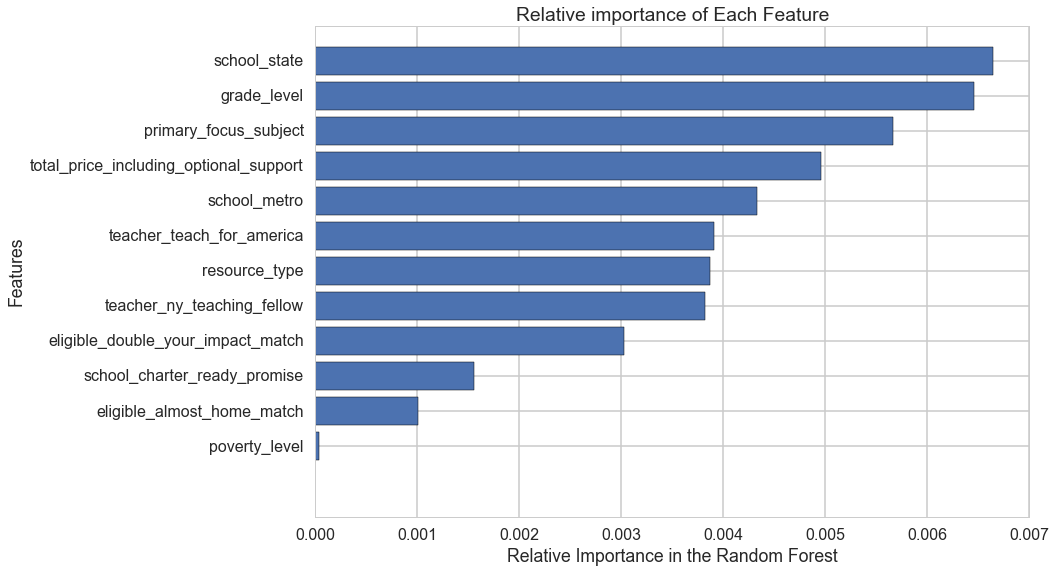

In [55]:
# TODO: Need to check, not sure
importance_list = clfForest.feature_importances_
name_list = proj[['total_price_including_optional_support','school_metro','primary_focus_subject','school_state','poverty_level','grade_level','resource_type',
                 'school_charter_ready_promise','eligible_double_your_impact_match','eligible_almost_home_match','teacher_teach_for_america','teacher_ny_teaching_fellow']].columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [56]:
from sklearn.ensemble import AdaBoostClassifier
clfAda = AdaBoostClassifier()

parameters = {"n_estimators": range(10, 60)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfAda, parameters, 
                                                       proj, c,'funding_status', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask
BEST {'n_estimators': 54} 0.277366897252 [mean: 0.17057, std: 0.06072, params: {'n_estimators': 10}, mean: 0.17425, std: 0.05650, params: {'n_estimators': 11}, mean: 0.16147, std: 0.04943, params: {'n_estimators': 12}, mean: 0.19578, std: 0.05446, params: {'n_estimators': 13}, mean: 0.16635, std: 0.03907, params: {'n_estimators': 14}, mean: 0.24163, std: 0.03993, params: {'n_estimators': 15}, mean: 0.19067, std: 0.07721, params: {'n_estimators': 16}, mean: 0.25115, std: 0.06936, params: {'n_estimators': 17}, mean: 0.20794, std: 0.03009, params: {'n_estimators': 18}, mean: 0.24373, std: 0.06432, params: {'n_estimators': 19}, mean: 0.21960, std: 0.05888, params: {'n_estimators': 20}, mean: 0.24783, std: 0.06627, params: {'n_estimators': 21}, mean: 0.21129, std: 0.08625, params: {'n_estimators': 22}, mean: 0.21607, std: 0.06902, params: {'n_estimators': 23}, mean: 0.25217, std: 0.06494, params: {'n_estimators': 24}, mean: 0.22186, std: 0.08220, params: {'n_estimators': 25}, mea

C:\Users\mjanyavula\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clfGB = GradientBoostingClassifier()

parameters = {"n_estimators": range(30, 60), "max_depth": [1, 2, 3, 4, 5]}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfGB, parameters, 
                                                       proj, c,'funding_status', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')